# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import pandas as pd

In [4]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
len(data.id.unique())

70000

In [7]:
data_new = data.iloc[:,1:12]
data_new.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [8]:
y = data['cardio']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_new, y, test_size=0.2)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


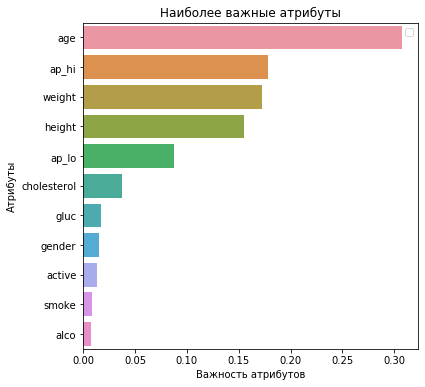

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

headers = list(data_new.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Данный датасет разобран в начале лекции 5. 

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

##### Протестируем гипотезу, что люди после 50 болеют чаще чем до 50 лет

In [29]:
age_50_and_more = data[data['age'] >50*365]
age_50_and_less = data[data['age'] <=50*365]

In [32]:
descriptives, results = rp.ttest(age_50_and_more.cardio, age_50_and_less.cardio)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cardio,48572.0,0.557811,0.496652,0.002254,0.553394,0.562228
1,cardio,21428.0,0.367976,0.482266,0.003295,0.361519,0.374434
2,combined,70000.0,0.499700,0.500003,0.001890,0.495996,0.503404


In [33]:
results

,Independent t-test,results
0,Difference (cardio - cardio) =,0.1898
1,Degrees of freedom =,69998.0000
2,t =,47.0204
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.3856
7,Hedge's g =,0.3856
8,Glass's delta =,0.3822
9,r =,0.1750


two-side p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

##### Протестируем гипотезу, что люди, которые занимаются спортом, болеют реже

In [34]:
data_active = data[data['active'] == 1]
data_no_active = data[data['active'] == 0]

In [40]:
descriptives, results = rp.ttest(data_active.cardio, data_no_active.cardio)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cardio,56261.0,0.490891,0.499921,0.002108,0.486760,0.495022
1,cardio,13739.0,0.535774,0.498737,0.004255,0.527434,0.544114
2,combined,70000.0,0.499700,0.500003,0.001890,0.495996,0.503404


In [41]:
results

,Independent t-test,results
0,Difference (cardio - cardio) =,-0.0449
1,Degrees of freedom =,69998.0000
2,t =,-9.4388
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.0898
7,Hedge's g =,-0.0898
8,Glass's delta =,-0.0898
9,r =,0.0357


two-side p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

##### Протестируем гипотезу, что люди, которые не курят, болеют реже

In [42]:
data_smoke = data[data['smoke'] == 1]
data_no_smoke = data[data['smoke'] == 0]

In [43]:
descriptives, results = rp.ttest(data_smoke .cardio, data_no_smoke.cardio)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cardio,6169.0,0.474793,0.499405,0.006358,0.462329,0.487258
1,cardio,63831.0,0.502107,0.499999,0.001979,0.498228,0.505986
2,combined,70000.0,0.499700,0.500003,0.001890,0.495996,0.503404


In [44]:
results

,Independent t-test,results
0,Difference (cardio - cardio) =,-0.0273
1,Degrees of freedom =,69998.0000
2,t =,-4.0976
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.0546
7,Hedge's g =,-0.0546
8,Glass's delta =,-0.0547
9,r =,0.0155


In [ ]:
two-side p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

In [ ]:
##### Протестируем гипотезу, что люди, которые не употребляют алкоголь, болеют реже

In [46]:
data_alko = data[data['alco'] == 1]
data_no_alko = data[data['alco'] == 0]

In [48]:
descriptives, results = rp.ttest(data_alko.cardio, data_no_alko.cardio)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cardio,3764.0,0.484325,0.499821,0.008147,0.468353,0.500298
1,cardio,66236.0,0.500574,0.500003,0.001943,0.496766,0.504382
2,combined,70000.0,0.499700,0.500003,0.001890,0.495996,0.503404


In [49]:
results

,Independent t-test,results
0,Difference (cardio - cardio) =,-0.0162
1,Degrees of freedom =,69998.0000
2,t =,-1.9394
3,Two side test p value =,0.0525
4,Difference < 0 p value =,0.0262
5,Difference > 0 p value =,0.9738
6,Cohen's d =,-0.0325
7,Hedge's g =,-0.0325
8,Glass's delta =,-0.0325
9,r =,0.0073


In [ ]:
two-side p-value > 0.05, поэтому можно сказать что статистическое различие между атрибутами не имеется.